<a href="https://colab.research.google.com/github/IvanaLalatovic/DomaciNaukaOPodacima/blob/master/DrugiDomaciIvanaLalatovic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kodom u nastavku dobijamo uvid u strukturu i statistiku podataka koji se nalaze u datoteci "Salary Data.csv". Sav kod u nastavku je neophodan kako bi u trećem domaćem zadatku predstavili sistem za predikciju plata u određenom poslu na osnovu ovog data seta. Učitavamo podatke, prikazujemo prvih par redova i generišemo opštu statistiku. Prvo importujemo biblioteke NumPy i Pandas za matematičke operacije i rad sa nizovima, i za manipulaciju i analizu podataka. Učitavamo csv fajl i sačuvamo ga u DataFrame pod nazivom 'data'. Naredba data.describe() generiše opštu statistiku za numeričke kolone 'data' kao što su broj, srednja vrijednost, standardna devijacija, minimum, 25. percentil, medijana, 75. percentil i maksimum. 

In [1]:
import numpy as np 
import pandas as pd 

Tabelarni prikaz izvornog skupa podataka


In [2]:
data = pd.read_csv('Salary Data.csv')
print(data)
data.head()

     Identifier  Age  Gender Education Level                      Job Title  \
0             1   32    Male      Bachelor's              Software Engineer   
1             2   28  Female        Master's                   Data Analyst   
2             3   45    Male             PhD                 Senior Manager   
3             4   36  Female      Bachelor's                Sales Associate   
4             5   52    Male        Master's                       Director   
..          ...  ...     ...             ...                            ...   
368         369   35  Female      Bachelor's       Senior Marketing Analyst   
369         370   43    Male        Master's         Director of Operations   
370         371   29  Female      Bachelor's         Junior Project Manager   
371         372   34    Male      Bachelor's  Senior Operations Coordinator   
372         373   44  Female             PhD        Senior Business Analyst   

     Years of Experience  Salary  
0               

,Identifier,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,1,32,Male,Bachelor's,Software Engineer,5.0,90000
1,2,28,Female,Master's,Data Analyst,3.0,65000
2,3,45,Male,PhD,Senior Manager,15.0,150000
3,4,36,Female,Bachelor's,Sales Associate,7.0,60000
4,5,52,Male,Master's,Director,20.0,200000


In [3]:
data.describe()

,Identifier,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000,373.000000
mean,187.000000,37.431635,10.030831,100577.345845
std,107.820066,7.069073,6.557007,48240.013482
min,1.000000,23.000000,0.000000,350.000000
25%,94.000000,31.000000,4.000000,55000.000000
50%,187.000000,36.000000,9.000000,95000.000000
75%,280.000000,44.000000,15.000000,140000.000000
max,373.000000,53.000000,25.000000,250000.000000


Sljedećim kodom dodajemo novu kolonu 'Starting age' u kojoj ćemo izvesti podatke potencijalnog broja godina koliko su navedeni radnici imali kada su počeli da se bave svojim poslom. Podatke dobjemo tako što od godina isustva oduzememo trenutni broj godina. Sljedećim redom koda dobijamo prikaz nove kolone i korišćene dvije kolone.

Tabelarni prikaz izvedenih numeričkih atributa

In [4]:
data['Starting age'] = data['Age'] - data['Years of Experience']
print(data[['Age', 'Years of Experience', 'Starting age']])

     Age  Years of Experience  Starting age
0     32                  5.0          27.0
1     28                  3.0          25.0
2     45                 15.0          30.0
3     36                  7.0          29.0
4     52                 20.0          32.0
..   ...                  ...           ...
368   35                  8.0          27.0
369   43                 19.0          24.0
370   29                  2.0          27.0
371   34                  7.0          27.0
372   44                 15.0          29.0

[373 rows x 3 columns]


Transformisanje kategorija iz tekstualnog u numericki oblik za sve atribute


Ovaj kod se odnosi na preprocesiranje kategoričkih atributa u podacima korišćenjem One-Hot Encodinga i Label Encodinga. Importujemo simpleImputer za rješavanje nedostajućih vrijednosti, OneHotENcoder za enkodiranje kategoričkih atributa, ColumnTransformer, LinearRegression i LabelEncoder koji imaju istu funkciju kao i njihov naziv. PRva linija koda deklariše koji su kategorički atributi. one_hot_encoded_data = pd.get_dummies(data, columns=categorical_attributes): Ova linija koda koristi funkciju get_dummies iz pandas biblioteke kako bi se izvršio One-Hot Encoding za sve kategoričke atribute. Tako dobijamo DataFrame one_hot_encoded_data sa novim kolonama koje predstavljaju kodirane vrijednosti kategoričkih atributa. Sljedećoom linijom koda stvaramo instancu LabelEncoder objekta a petljom primjenjujemo Label Encoding za svaki kategorički atribut tako što mijenjamo originalne vrijednosti sa kodiranim numeričkim i ispisujemo rezultat.

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


In [6]:
categorical_attributes = ['Gender', 'Job Title', 'Education Level']
one_hot_encoded_data = pd.get_dummies(data, columns=categorical_attributes)
label_encoder = LabelEncoder()
for attribute in categorical_attributes:
    data[attribute] = label_encoder.fit_transform(data[attribute])
print("One-Hot Encoded Data:")
print(one_hot_encoded_data.head())
print()
print("Label Encoded Data:")
print(data.head())

One-Hot Encoded Data:
   Identifier  Age  Years of Experience  Salary  Starting age  Gender_Female  \
0           1   32                  5.0   90000          27.0              0   
1           2   28                  3.0   65000          25.0              1   
2           3   45                 15.0  150000          30.0              0   
3           4   36                  7.0   60000          29.0              1   
4           5   52                 20.0  200000          32.0              0   

   Gender_Male  Job Title_Account Manager  Job Title_Accountant  \
0            1                          0                     0   
1            0                          0                     0   
2            1                          0                     0   
3            0                          0                     0   
4            1                          0                     0   

   Job Title_Administrative Assistant  ...  Job Title_Technical Writer  \
0                   

In [7]:
data

,Identifier,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Starting age
0,1,32,1,0,159,5.0,90000,27.0
1,2,28,0,1,17,3.0,65000,25.0
2,3,45,1,2,130,15.0,150000,30.0
3,4,36,0,0,101,7.0,60000,29.0
4,5,52,1,1,22,20.0,200000,32.0
...,...,...,...,...,...,...,...,...
368,369,35,0,0,131,8.0,85000,27.0
369,370,43,1,1,30,19.0,170000,24.0
370,371,29,0,0,70,2.0,40000,27.0
371,372,34,1,0,137,7.0,90000,27.0


Kreiranje skupa za testiranje na osnovu hash vrijednosti jedinstvenog identifikatora i stratifikovanim uzorkovanjem

Dalje se kod se odnosi na podjelu podataka na skupove za treniranje i testiranje koristeći funkciju train_test_split iz biblioteke scikit-learn. prvo importujemo funkciju za to koja se naziva train_test_split, zatim definišemo listu atributa koji će biti uzeti u obzir prilikom treniranja modela i definišemo ciljani atribut koji je u ovom slučaju plata zaposlenih. Parametar test_size postavljen je na 0.2, što znači da će 20% podataka biti rezervisano za testiranje. Parametar random_state postavljen je na 42 kako bi se osigurala mogućnost ponavljanja rezultata. Stratifikacija se vrši na temelju heš vrijednosti jedinstvenog identifikatora, tako da su klase uravnotežene u skupu za testiranje. Na kraju se ispisuje br instanci u skupu za testitanje i identifikatori instanci.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
attributes = ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary', 'Identifier','Starting age']
target = 'Salary'
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['Identifier'].apply(lambda x: hash(x) % 2))


In [10]:
print("Broj instanci u skupu za testiranje:", len(test_data))
print("Identifikatori u skupu za testiranje:", test_data['Identifier'])

Broj instanci u skupu za testiranje: 75
Identifikatori u skupu za testiranje: 360    361
276    277
41      42
365    366
259    260
      ... 
250    251
200    201
160    161
117    118
359    360
Name: Identifier, Length: 75, dtype: int64


Razdvajanje prediktora i ciljanih vrijednosti

*Zbog problema prilikom pokretanja koda ponovo je dodat atribut 'Starting age'.

Prvo definišemo listu prediktora i ciljanog atributa koji se predviđa. Kreiramo dataFrame-ove samo sa prediktorima (x) i ciljanim vrijednostima (y)i ispisujemo ih. Ovim kodom se pripremaju podaci za treniranje modela. 

In [11]:
data['Starting age'] = data['Age'] - data['Years of Experience']
print(data[['Age', 'Years of Experience', 'Starting age']])


     Age  Years of Experience  Starting age
0     32                  5.0          27.0
1     28                  3.0          25.0
2     45                 15.0          30.0
3     36                  7.0          29.0
4     52                 20.0          32.0
..   ...                  ...           ...
368   35                  8.0          27.0
369   43                 19.0          24.0
370   29                  2.0          27.0
371   34                  7.0          27.0
372   44                 15.0          29.0

[373 rows x 3 columns]


In [12]:
predictors = ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Starting age']
target = 'Salary'
X = data[predictors]
y = data[target]
print("Prediktori (X):")
print(X.head())

print("\nCiljne vrijednosti (y):")
print(y.head())

Prediktori (X):
   Age  Gender  Education Level  Job Title  Years of Experience  Starting age
0   32       1                0        159                  5.0          27.0
1   28       0                1         17                  3.0          25.0
2   45       1                2        130                 15.0          30.0
3   36       0                0        101                  7.0          29.0
4   52       1                1         22                 20.0          32.0

Ciljne vrijednosti (y):
0     90000
1     65000
2    150000
3     60000
4    200000
Name: Salary, dtype: int64


Zamjena nedostajućih vrijednosti srednjom vrijednošću kako bi se održala distribucija podataka

Prvo definišemo listu atributa koji sadrže nedostajuće vrijednosti, pa kreiramo instancu SimpleImputer objekta s definisanom strategijom zamjene nedostajućih vrijednosti sa prosječnom vrijednošću atributa. Nakon toga ga primjenjujemo na odabrane atribute i ispusujemo prvih nekoliko redova.

In [13]:
attributes_with_missing_values = ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Starting age']
imputer = SimpleImputer(strategy='mean')
data[attributes_with_missing_values] = imputer.fit_transform(data[attributes_with_missing_values])
print(data.head())

   Identifier   Age  Gender  Education Level  Job Title  Years of Experience  \
0           1  32.0     1.0              0.0      159.0                  5.0   
1           2  28.0     0.0              1.0       17.0                  3.0   
2           3  45.0     1.0              2.0      130.0                 15.0   
3           4  36.0     0.0              0.0      101.0                  7.0   
4           5  52.0     1.0              1.0       22.0                 20.0   

   Salary  Starting age  
0   90000          27.0  
1   65000          25.0  
2  150000          30.0  
3   60000          29.0  
4  200000          32.0  


Crtanje histograma za numeričke atribute

Importujemo matplotlib.pyplot za crtanje histograma numeričkih atributa, a obzirom da smo sve atribute promijenili u numeričke svi su definisani u listi i predstavljeni. Odabrani atributi imaju 10 binova. Postavljamo oznaku na x i y osi, i naziv histograma.

In [14]:
import matplotlib.pyplot as plt

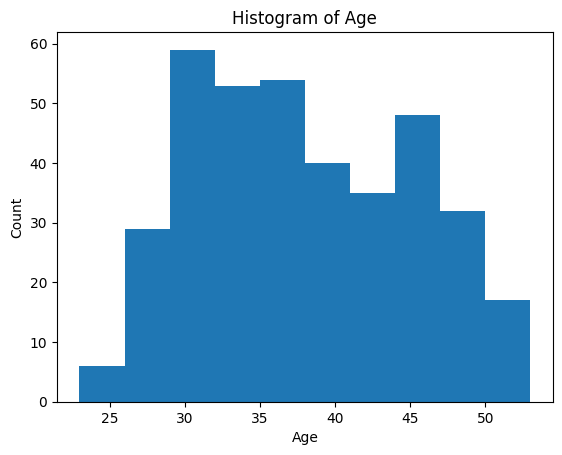

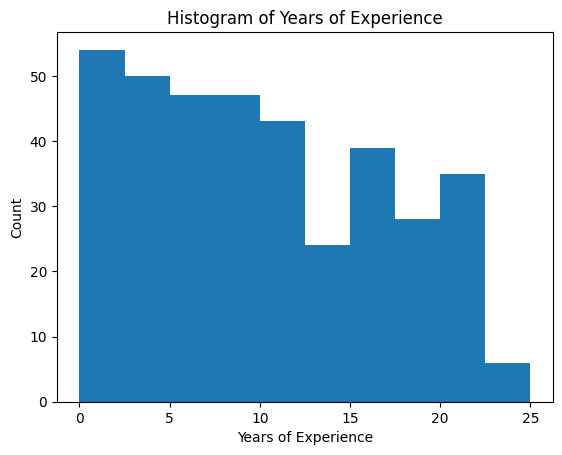

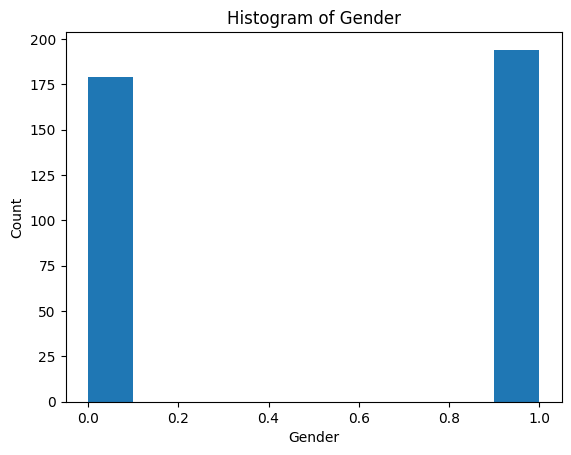

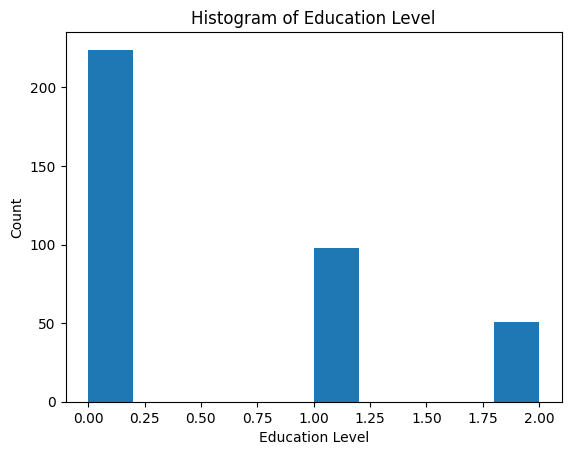

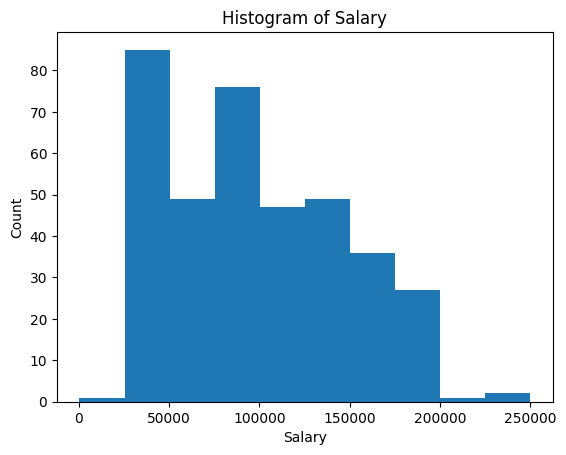

In [15]:
numeric_attributes = ['Age', 'Years of Experience','Gender', 'Education Level', 'Salary']
for attribute in numeric_attributes:
    plt.hist(data[attribute], bins=10)  
    plt.xlabel(attribute)
    plt.ylabel('Count')
    plt.title(f'Histogram of {attribute}')
    plt.show()

Računanje koeficijenata korelacije između odabranih parova atributa (min 2 para) i njihov grafički prikaz

Prvo definišemo listu parova atributa za koje će se izračunati korelacija i nacrtati scatter plot.U petlji se prolazi kroz svaki par atributa iz liste.  Izračunava se koeficijent korelacije između atributa 1 i 2 iz skupa podataka a zatim crtamo tačke na scatter plotu sa atributom 1 na x-osi i atributom 2 na y-osi. U nastavku su postavljeni nazivi osa i grafika sa koeficijentom korelacije.

Koeficijent korelacije između nivoa obrazovanja i plate iznosi 0.67 što ukazuje na jaku pozitivnu korelaciju između ta dva atributa. Vrijednost koeficijenta korelacije je bliska 1, što znači da postoji tendencija da se oba atributa povećavaju ili smanjuju zajedno, odnosno da osobe sa višim nivoom obrazovanja imaju tendenciju da imaju veće plate.

Koeficijent korelacije 0.93 ukazuje na veoma jaku pozitivnu korelaciju između godina iskustva i plate. To znači da postoji snažna tendencija da osobe sa više godina iskustva imaju više plate. Ova visoka korelacija ukazuje na važnost godina iskustva u određivanju visine plate.

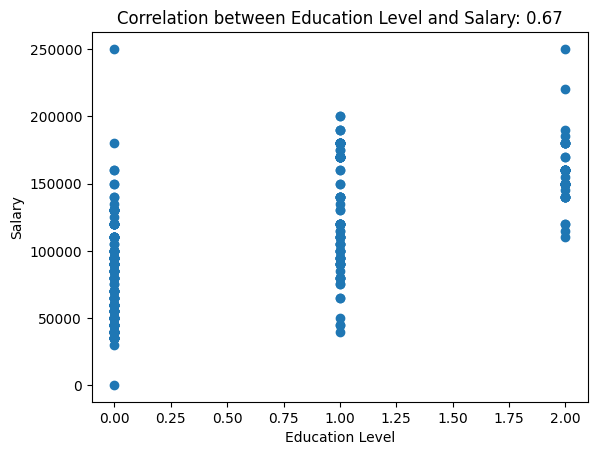

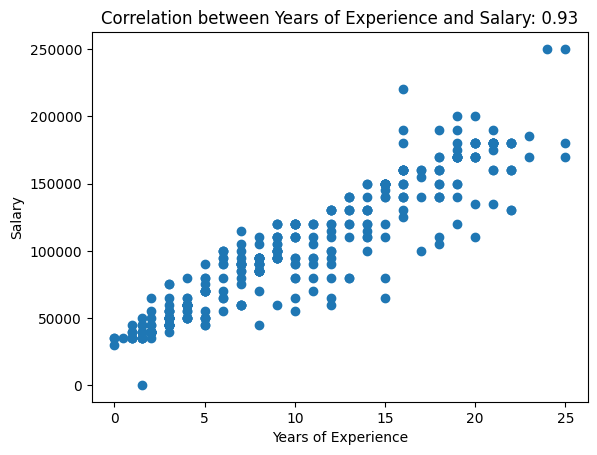

In [16]:
attribute_pairs = [('Education Level', 'Salary'), ('Years of Experience', 'Salary')]
for attribute1, attribute2 in attribute_pairs:
    correlation = data[attribute1].corr(data[attribute2])
    plt.scatter(data[attribute1], data[attribute2])
    plt.xlabel(attribute1)
    plt.ylabel(attribute2)
    plt.title(f'Correlation between {attribute1} and {attribute2}: {correlation:.2f}')
    plt.show()

In [17]:
data.dtypes

Identifier               int64
Age                    float64
Gender                 float64
Education Level        float64
Job Title              float64
Years of Experience    float64
Salary                   int64
Starting age           float64
dtype: object

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Identifier           373 non-null    int64  
 1   Age                  373 non-null    float64
 2   Gender               373 non-null    float64
 3   Education Level      373 non-null    float64
 4   Job Title            373 non-null    float64
 5   Years of Experience  373 non-null    float64
 6   Salary               373 non-null    int64  
 7   Starting age         373 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 23.4 KB


In [19]:
data.isna().sum()

Identifier             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Starting age           0
dtype: int64